# About this notebook

This notebook will contain my manual analysis of some abundance files/metadata I am using for testing purposes. 

The idea is to get a "reference" of sort of what I would normally do, and compare this to what the LLM decides to do.

In [49]:
# Load libraries

library(tidyverse)
library(edgeR)
library(limma)
library(tximport)
library(DESeq2)
library(janitor) # for cleaning up column names, though I'm not sure if this will be something that the LLM uses...


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [52]:
# Load metadata

meta <- read_csv("~/work/notebooks//Testing/GSE268034/GSE268034_series_matrix_metadata.csv") %>%
    clean_names() %>%
    mutate(genotype_clean = str_remove_all(genotype_ch1, " "))
meta

Rows: 12 Columns: 44
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (41): title, geo_accession, status, submission_date, last_update_date, t...
dbl  (3): channel_count, taxid_ch1, data_row_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,library_source,library_strategy,relation,relation_1,supplementary_file_1,cell_line_ch1,cell_type_ch1,genotype_ch1,treatment_ch1,genotype_clean
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SUDHL4_LacZ_RGFP0_1,GSM8284502,Public on Aug 08 2024,May 21 2024,Aug 08 2024,SRA,1,SU-DHL-4,Homo sapiens,cell line: SU-DHL-4,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41479047,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24625208,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM8284nnn/GSM8284502/suppl/GSM8284502_SUDHL4_LacZ_RGFP0_1.txt.gz,SU-DHL-4,diffuse large B-cell lymphoma cells,WT,DMSO,WT
SUDHL4_LacZ_RGFP0_2,GSM8284503,Public on Aug 08 2024,May 21 2024,Aug 08 2024,SRA,1,SU-DHL-4,Homo sapiens,cell line: SU-DHL-4,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41479046,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24625209,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM8284nnn/GSM8284503/suppl/GSM8284503_SUDHL4_LacZ_RGFP0_2.txt.gz,SU-DHL-4,diffuse large B-cell lymphoma cells,WT,DMSO,WT
SUDHL4_LacZ_RGFP5_1,GSM8284504,Public on Aug 08 2024,May 21 2024,Aug 08 2024,SRA,1,SU-DHL-4,Homo sapiens,cell line: SU-DHL-4,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41479045,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24625210,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM8284nnn/GSM8284504/suppl/GSM8284504_SUDHL4_LacZ_RGFP5_1.txt.gz,SU-DHL-4,diffuse large B-cell lymphoma cells,WT,RGFP966 (5 µM),WT
SUDHL4_LacZ_RGFP5_2,GSM8284505,Public on Aug 08 2024,May 21 2024,Aug 08 2024,SRA,1,SU-DHL-4,Homo sapiens,cell line: SU-DHL-4,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41479044,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24625211,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM8284nnn/GSM8284505/suppl/GSM8284505_SUDHL4_LacZ_RGFP5_2.txt.gz,SU-DHL-4,diffuse large B-cell lymphoma cells,WT,RGFP966 (5 µM),WT
SUDHL4_GNASKO2_RGFP0_1,GSM8284506,Public on Aug 08 2024,May 21 2024,Aug 08 2024,SRA,1,SU-DHL-4,Homo sapiens,cell line: SU-DHL-4,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41479043,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24625212,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM8284nnn/GSM8284506/suppl/GSM8284506_SUDHL4_GNASKO2_RGFP0_1.txt.gz,SU-DHL-4,diffuse large B-cell lymphoma cells,GNAS knockout,DMSO,GNASknockout
SUDHL4_GNASKO2_RGFP0_2,GSM8284507,Public on Aug 08 2024,May 21 2024,Aug 08 2024,SRA,1,SU-DHL-4,Homo sapiens,cell line: SU-DHL-4,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41479042,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24625213,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM8284nnn/GSM8284507/suppl/GSM8284507_SUDHL4_GNASKO2_RGFP0_2.txt.gz,SU-DHL-4,diffuse large B-cell lymphoma cells,GNAS knockout,DMSO,GNASknockout
SUDHL4_GNASKO2_RGFP5_1,GSM8284508,Public on Aug 08 2024,May 21 2024,Aug 08 2024,SRA,1,SU-DHL-4,Homo sapiens,cell line: SU-DHL-4,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41479041,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24625214,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM8284nnn/GSM8284508/suppl/GSM8284508_SUDHL4_GNASKO2_RGFP5_1.txt.gz,SU-DHL-4,diffuse large B-cell lymphoma cells,GNAS knockout,RGFP966 (5 µM),GNASknockout
SUDHL4_GNASKO2_RGFP5_2,GSM8284509,Public on Aug 08 2024,May 21 2024,Aug 08 2024,SRA,1,SU-DHL-4,Homo sapiens,cell line: SU-DHL-4,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41479040,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24625215,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM8284nnn/GSM8284509/suppl/GSM8284509_SUDHL4_GNASKO2_RGFP5_2.txt.gz,SU-DHL-4,diffuse large B-cell lymphoma cells,GNAS knockout,RGFP966 (5 µM),GNASknockout
SUDHL4_GNASKO3_RGFP0_1,GS

In [48]:
colnames(meta)

[1] "title"                   "geo_accession"          
 [3] "status"                  "submission_date"        
 [5] "last_update_date"        "type"                   
 [7] "channel_count"           "source_name_ch1"        
 [9] "organism_ch1"            "characteristics_ch1"    
[11] "characteristics_ch1.1"   "characteristics_ch1.2"  
[13] "characteristics_ch1.3"   "treatment_protocol_ch1" 
[15] "growth_protocol_ch1"     "molecule_ch1"           
[17] "extract_protocol_ch1"    "extract_protocol_ch1.1" 
[19] "taxid_ch1"               "data_processing"        
[21] "data_processing.1"       "data_processing.2"      
[23] "platform_id"             "contact_name"           
[25] "contact_email"           "contact_phone"          
[27] "contact_institute"       "contact_address"        
[29] "contact_city"            "contact_state"          
[31] "contact_zip/postal_code" "contact_country"        
[33] "data_row_count"          "instrument_model"       
[35] "library_selection"       "library_source"         
[37] "library_strategy"        "relation"               
[39] "relation.1"              "supplementary_file_1"   
[41] "cell line:ch1"           "cell type:ch1"          
[43] "genotype:ch1"            "treatment:ch1"

In [18]:
# List the abundance files. The tsv files should work...

files <- list.files(path = "~/work/data/kallisto_output/",
                    pattern = "abundance.tsv",
                    recursive = TRUE,
                    full.names = TRUE)
tx2gene <- read_tsv("~/work/data/kallisto_indices//human/t2g.txt",
                   col_names = FALSE) %>%
dplyr::select(1, 3) %>%
drop_na()
kallisto <- tximport(files = files,
         type = "kallisto",
         tx2gene = tx2gene,
         ignoreAfterBar = TRUE,
                    countsFromAbundance = "lengthScaledTPM")

Rows: 227665 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X2, X3, X4, X5, X8
dbl (2): X6, X7

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Note: importing `abundance.h5` is typically faster than `abundance.tsv`

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


transcripts missing from tx2gene: 24683

summarizing abundance

summarizing counts

summarizing length



In [53]:
DGE <- DGEList(counts = kallisto$counts,
              samples = meta)

In [54]:
str(DGE)

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 2
  .. ..$ : num [1:25668, 1:12] 0 0 0 0 0 0 0 0 0 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:25668] "A1BG" "A1BG-AS1" "A1CF" "A2M" ...
  .. .. .. ..$ : chr [1:12] "Sample1" "Sample2" "Sample3" "Sample4" ...
  .. ..$ :'data.frame':	12 obs. of  48 variables:
  .. .. ..$ group                  : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ lib.size               : num [1:12] 26356 25952 28192 26604 25214 ...
  .. .. ..$ norm.factors           : num [1:12] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ title                  : chr [1:12] "SUDHL4_LacZ_RGFP0_1" "SUDHL4_LacZ_RGFP0_2" "SUDHL4_LacZ_RGFP5_1" "SUDHL4_LacZ_RGFP5_2" ...
  .. .. ..$ geo_accession          : chr [1:12] "GSM8284502" "GSM8284503" "GSM8284504" "GSM8284505" ...
  .. .. ..$ status                 : chr [1:12] "Public on Aug 08 2024" "Public on Aug 08 2024" "Public on Aug 08 2024" "Public on Aug 08 2024" ...
  .. .. ..

I'm immediately noticing I will need to integrate the results.txt (or whatever) output from when I extracted the FASTQ files, since this is the way I will be using to link GEO accessions to the SRA IDs.

Just for testing purposes (to make sure all the command I intend can run on the container), I won't worry about this yet. However, it is something I will need to consider when building the framework.

For whatever reason this was VERY quick (quicker than when I run this on my laptop...)

In [56]:
keep.exprs <- filterByExpr(DGE,
                          group = DGE$samples$genotype_clean)

In [57]:
DGE.filtered <- DGE[keep.exprs, keep.lib.sizes = FALSE]

In [58]:
dim(DGE)
dim(DGE.filtered)

[1] 25668    12

[1] 621  12

Ah. I imagine since I only am using a subset of the FASTQ files, that is why everything has been extraordinarily quick. 

In [59]:
DGE.final <- calcNormFactors(DGE.filtered)

In [63]:
design <- model.matrix(data = DGE.final$samples,
                       ~0 + genotype_clean)
colnames(design) <- str_remove_all(colnames(design),
                                   "genotype_clean")
contrast.matrix <- makeContrasts(
    KO = "GNASknockout - WT",
    levels = colnames(design))

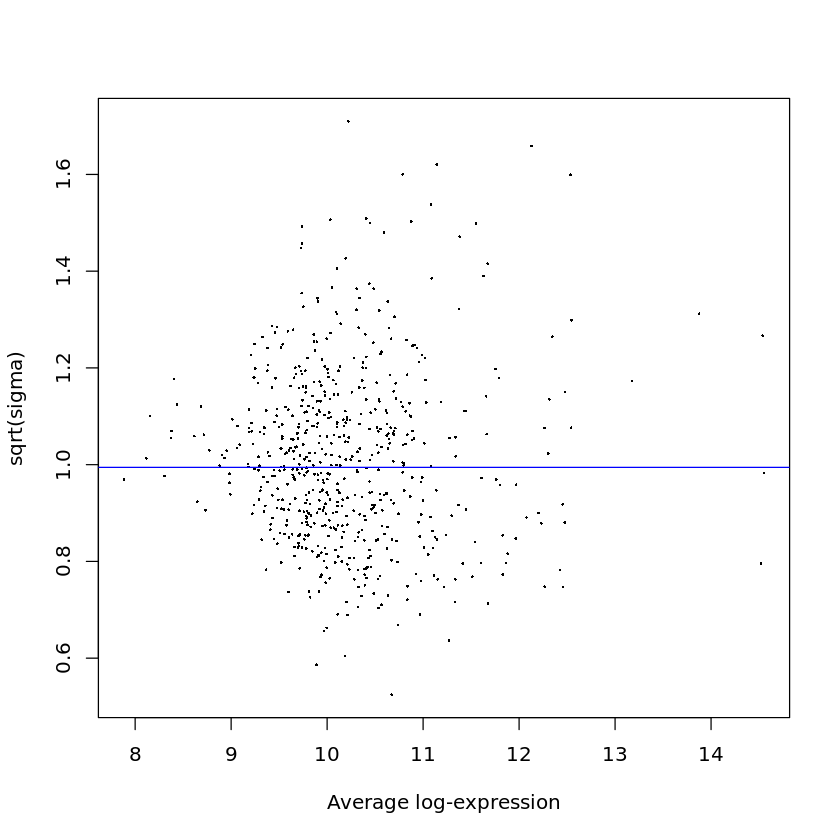

In [67]:
v <- voom(DGE.final,
          design)
vfit <- lmFit(v,
              design)
vfit <- contrasts.fit(vfit,
                      contrast.matrix)
efit <- eBayes(vfit)

plotSA(efit)

Well, given the lack of genes, I'm not too surprised that this is what the plot looks like. Anyway, it seems the rough pipeline is at least functional for now, so let's do the DEG analysis and roughly make sure it works

Side note - I chose a contrast that I quickly thought would probably be worth doing (i.e. a glance tells me it would probably be useful?), but I didn't really check in depth to be honest.

In [71]:
contrasts <- colnames(contrast.matrix)

LFC.summary <- sapply(contrasts, function(x){
    lfc.list <- list()
    top <- topTable(efit,
                    coef = x,
                    number = Inf) %>%
    list()
    lfc.list <- append(lfc.list, top)
    })

LFC.summary[[1]] %>%
arrange(adj.P.Val)

    

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPL41,0.5540266,11.674890,2.972225,0.008019883,0.6365989,-4.199617
GNB1,-1.0707043,10.593562,-3.764368,0.001373350,0.6365989,-4.221713
TTN,1.4961492,12.128468,2.821683,0.011126588,0.6365989,-4.245745
DGKD,-1.0046919,10.625564,-3.033836,0.007006884,0.6365989,-4.317825
PAK2,-0.9756117,10.637952,-3.022942,0.007176475,0.6365989,-4.318063
HNRNPUL1,-1.1018379,10.133262,-3.026324,0.007123415,0.6365989,-4.421977
XRN1,-1.4622253,9.757983,-3.254400,0.004303672,0.6365989,-4.474913
AFF4,-1.6437223,9.483334,-2.929447,0.008805207,0.6365989,-4.522281
CEP192,-1.4164159,9.480559,-2.852505,0.010408451,0.6365989,-4.523883


Ok, this technically works - I am curious what the LLM will do.